# Price Discount Analysis on Amazon Products

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
df = pd.read_csv('amazon.csv')

# Exploratory Data Analysis

In [4]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
df.tail()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


In [6]:
df.shape

(1465, 16)

- it has 1465 rows and 16 attributes

In [7]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

- After checking the null values rating_count has 2 null values so replce the null values with median value

In [8]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

- as datatype of every attribute is object we need to change some attributes datatype to float or int 
- the attributes need to change are discounted_price, actual_price, discount_percentage, rating, rating_count
- we can change its datatype by removing unneccesary symbols such as "," , "₹", etc.

In [10]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B08WRWPM22,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


- this is the description of dataset


In [11]:
df.nunique()

product_id             1351
product_name           1337
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   28
rating_count           1143
about_product          1293
user_id                1194
user_name              1194
review_id              1194
review_title           1194
review_content         1212
img_link               1412
product_link           1465
dtype: int64

- from the above unique values of each feature we can observe the following things
- 1. attributes img_link, product_link have 1412, 1465 unique values means very nearly equal to the total number of rows in the dataset so these 2 features doesn't contribute to model performance
  2. product_id (1351 unique out of 1465 total rows), product_name, user_id, review_id, etc. These are mostly identifiers or descriptive text, not categorical variables. so these attributes also doesn't contribute much to the model performance (due to more number of unique features with non-categorical variables)

In [12]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

Numerical type columns:
Index([], dtype='object')


- so as observed from the previous codes output all the attributes are object types so lets change some of them to float type in the data cleaning/ data preprocessing step

# Data Cleaning

In [13]:
# Remove commas and convert to numeric
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)

# Now fill missing values with the median
df['rating_count'].fillna(df['rating_count'].median(), inplace=True)

- removing "," from the rating_count attributes for converting it to float datatype
- filling null values of rating_count by median 

In [14]:
# Replace '₹' and ',' in price columns and convert to float
df['discounted_price'] = df['discounted_price'].str.replace(r'[₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].str.replace(r'[₹,]', '', regex=True).astype(float)

# Remove '%' from discount and convert to float
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '', regex=True).astype(float)

# Convert rating to float, replacing non-numeric values with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Display updated data types
print(df.dtypes)

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


- converting discounted_price, actual_price, discount_percentage to float datatype by removing the symbols '₹' and ',' and '%' respectively by using the regular expression
- after converting we can observe that datatypes of those 4 attributes cnverted to float datatype

In [15]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['product_id', 'product_name', 'category', 'about_product', 'user_id',
       'user_name', 'review_id', 'review_title', 'review_content', 'img_link',
       'product_link'],
      dtype='object')

Numerical type columns:
Index(['discounted_price', 'actual_price', 'discount_percentage', 'rating',
       'rating_count'],
      dtype='object')


- now it correctly classifies the numerical and object type datatypes

In [16]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 30:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 30:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

- generally we classify the data into 4 types they are categorical_features, non_categorical_features, discrete_features, continuous_features.
- object type features comes into categorical, non_categorical features where as numerical type features comes into discreate, continuous
- so based on that the above code classifies them accordingly
- if the feature has more than 30 unique attributes then it becomes continuous or non_categorical feature


In [17]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [18]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: []
Non-Categorical Features: ['product_id', 'product_name', 'category', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']
Discrete Features: ['rating']
Continuous Features: ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']


- here we can observe that the attribute 'category' is wrongly classified as non_categorical features
- this is beacause the number of unique features of 'category' is more than 30
- to avoid this we change the classify_features() function to Classify as categorical if it has a reasonable proportion of unique values 

In [19]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        unique_count = df[column].nunique()
        total_count = len(df[column])

        if df[column].dtype == 'object':
            # Classify as categorical if it has a reasonable proportion of unique values
            if unique_count / total_count < 0.5:  
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if unique_count < 30:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features


In [20]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [21]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['category']
Non-Categorical Features: ['product_id', 'product_name', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']
Discrete Features: ['rating']
Continuous Features: ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']


- now it correctly classifies the feature 'category' as Categorical feature

## Removing unneccessary columns

In [22]:
# Drop unnecessary columns
df = df.drop(columns=['product_id', 'product_name', 'about_product', 'user_id', 'user_name',
                      'review_id', 'review_title', 'review_content', 'img_link', 'product_link'])

- removing the unneccesay columns

In [23]:

# Display updated dataframe
df.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0
1,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0
2,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0
3,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0
4,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0


- thease are the top 5 values of new dataframe after removing unnecessary columns

In [24]:
df.nunique()

category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   25
rating_count           1143
dtype: int64

- now if we observe the unique values of new dataframe category attribute has 211 unique attributes which is not acceptable when looked manually because the values are very similar so we need to decrease the unique count by splitting the values to first word only

In [25]:
df['category'] = df['category'].str.split(r'[|,]').str[0]

- this code splits the value upto '|' symbol only that is first word only

In [26]:
df.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,Computers&Accessories,399.0,1099.0,64.0,4.2,24269.0
1,Computers&Accessories,199.0,349.0,43.0,4.0,43994.0
2,Computers&Accessories,199.0,1899.0,90.0,3.9,7928.0
3,Computers&Accessories,329.0,699.0,53.0,4.2,94363.0
4,Computers&Accessories,154.0,399.0,61.0,4.2,16905.0


- now we can observe that category feature has only first word

In [27]:
df['category'].unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

- so now the unique values of category feature are 9 only
- so we successfully reduced 211 unique vaules to 9 unique values 

In [28]:
df.isnull().sum()

category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           0
dtype: int64

- so by checking the null values of new dataframe we observer that 'rating' column has 1 missing value

### handling missing values after cleaning the data

In [29]:
# Now fill missing values with the median
df['rating'].fillna(df['rating'].median(), inplace=True)

- this piece of code replaces the null value of rating with median value

In [30]:
df.isnull().sum()

category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
dtype: int64

- so now the dataframe has so null or missing values

In [31]:
categorical, non_categorical, discrete, continuous = classify_features(df)

- lets classify again our new dataframe

In [32]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['category']
Non-Categorical Features: []
Discrete Features: ['rating']
Continuous Features: ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']


# visualizing dataset

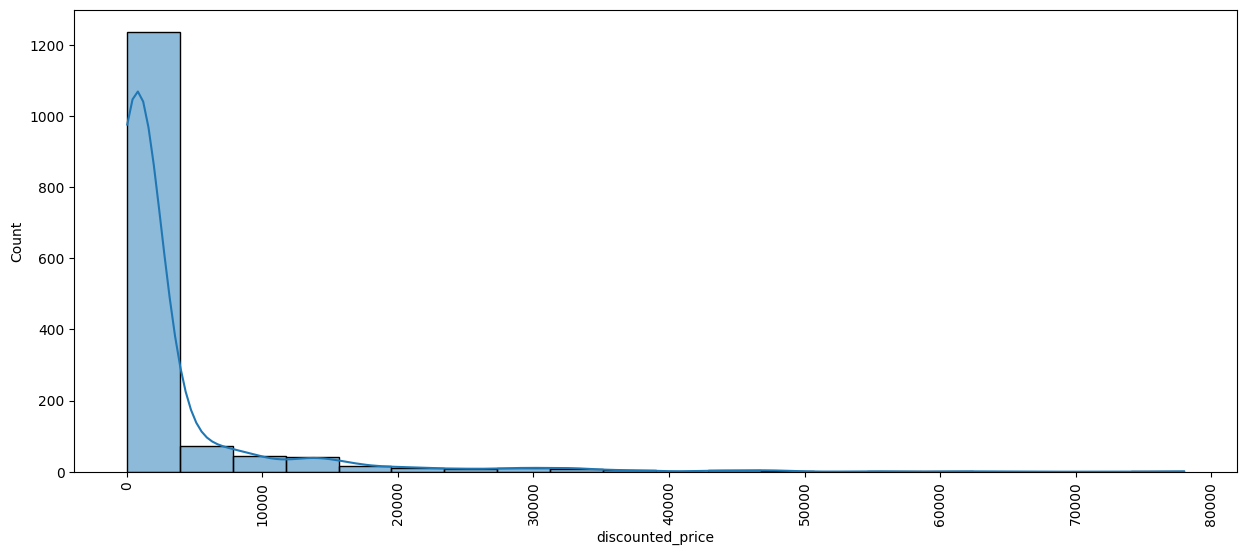

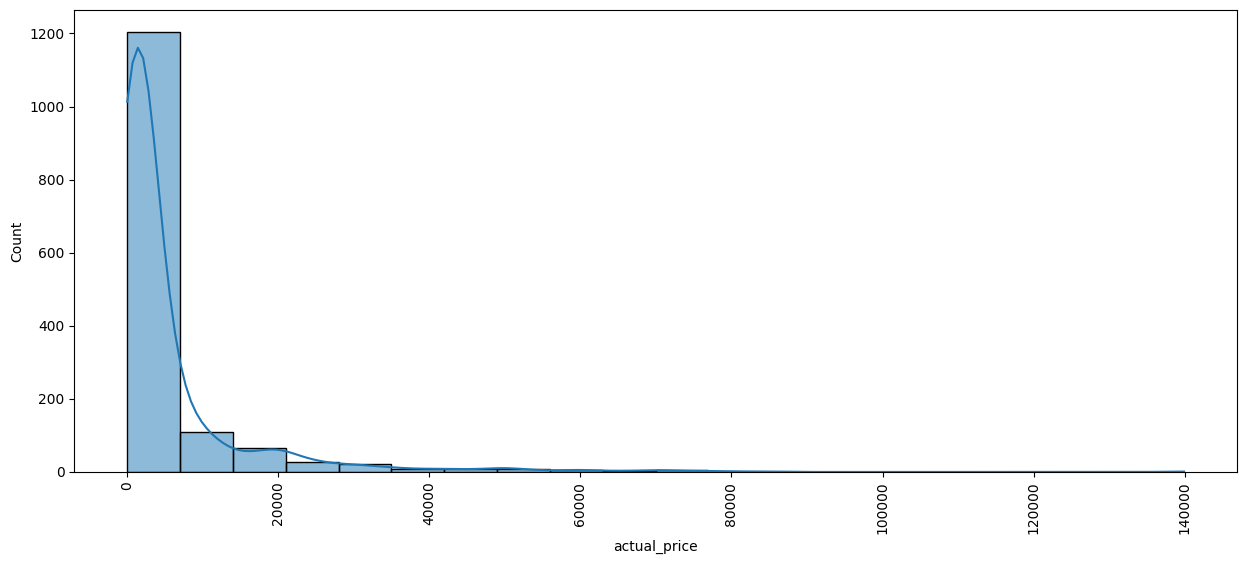

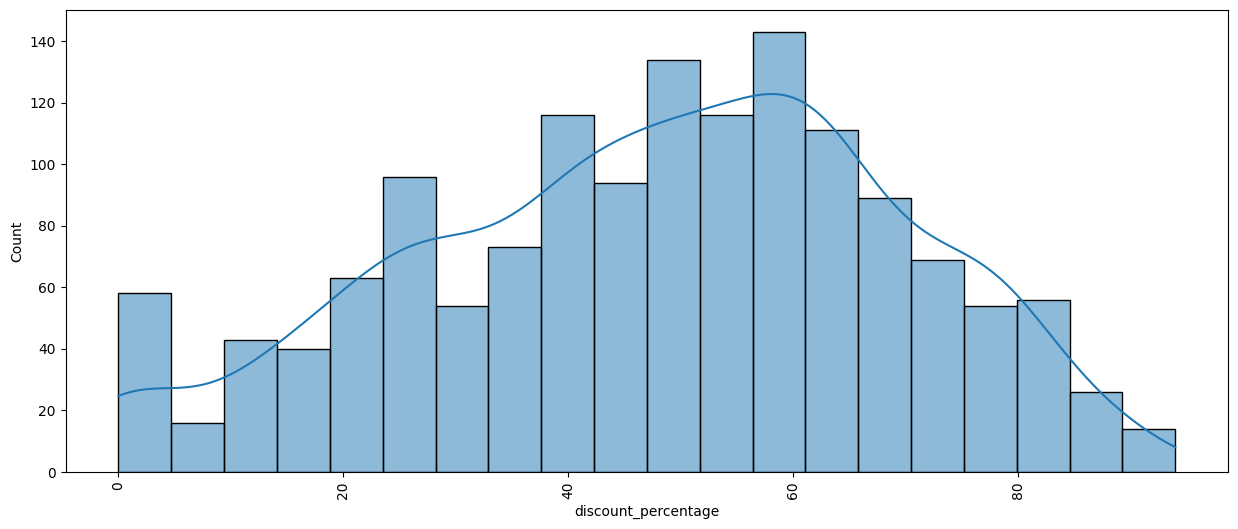

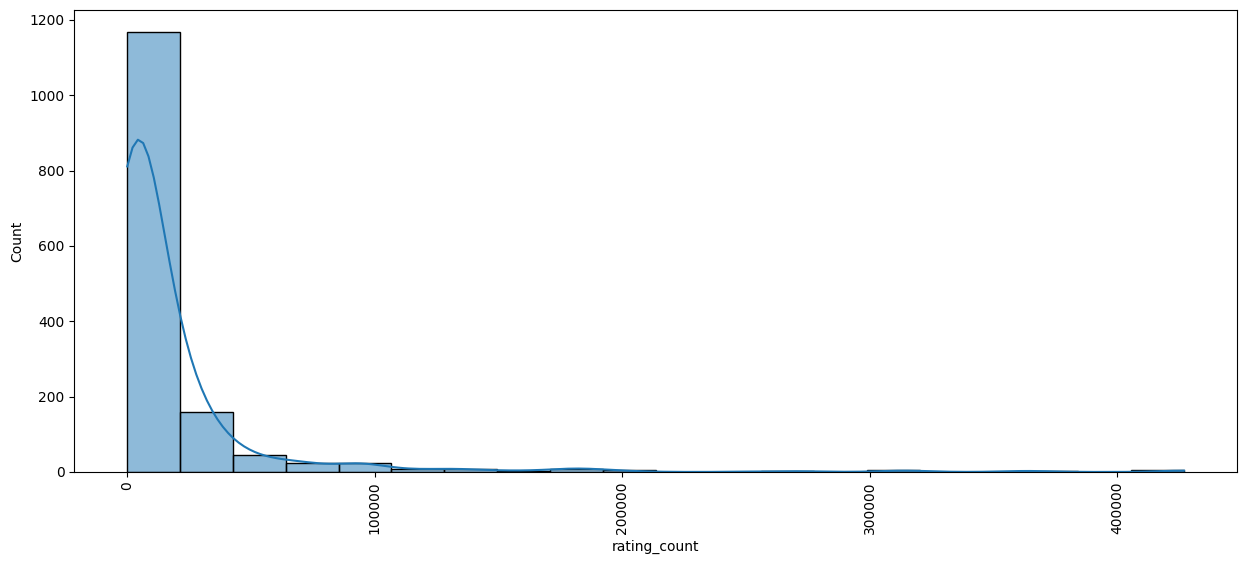

In [33]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

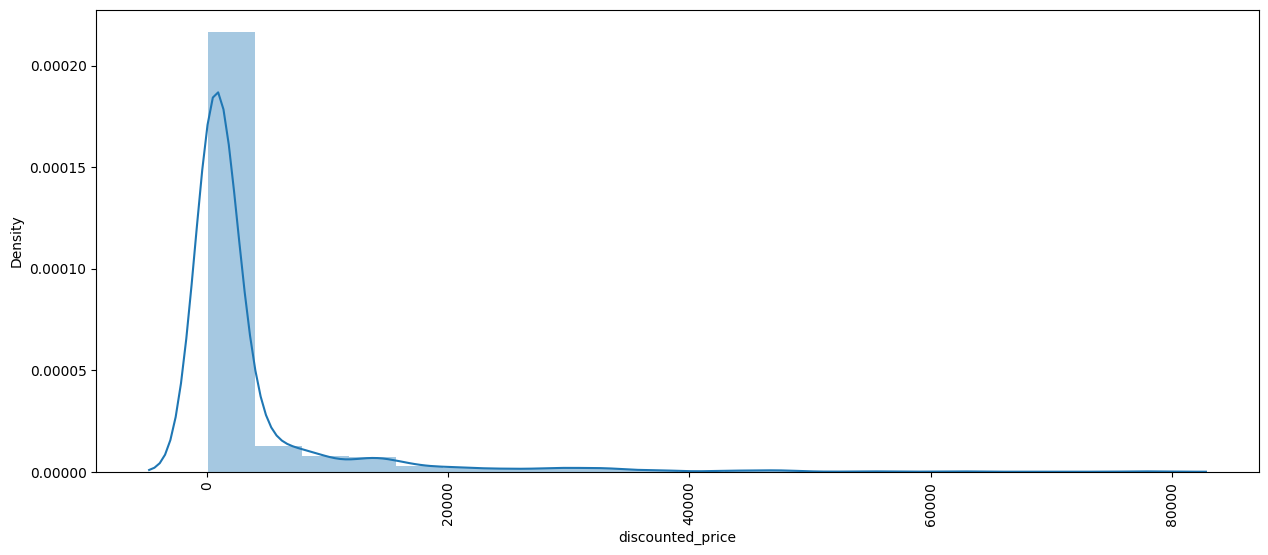

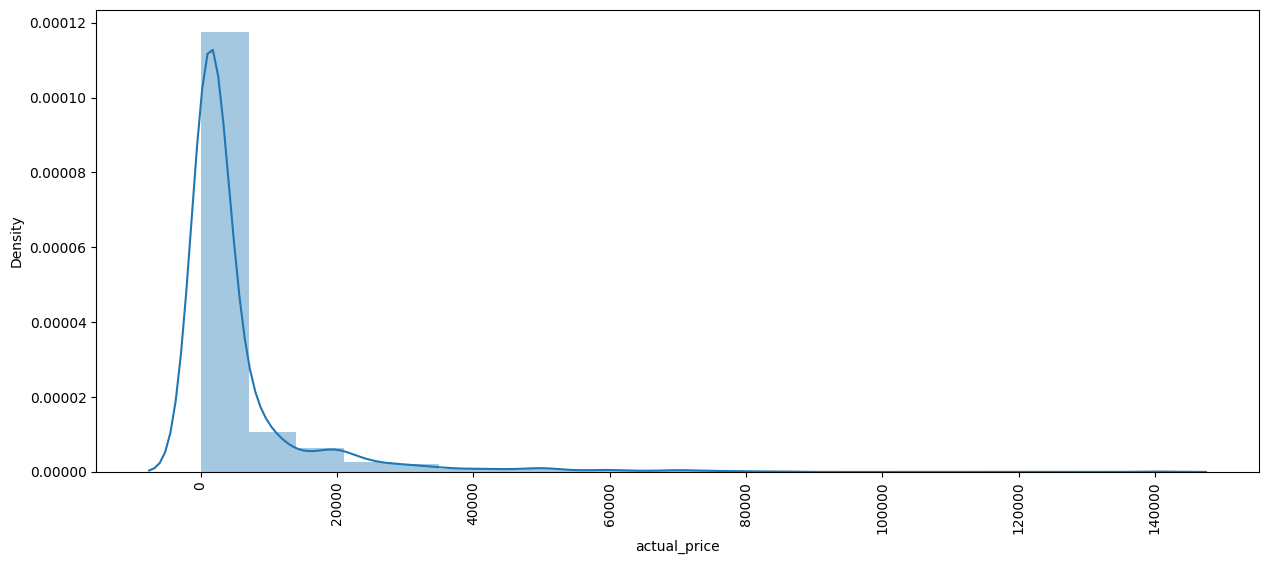

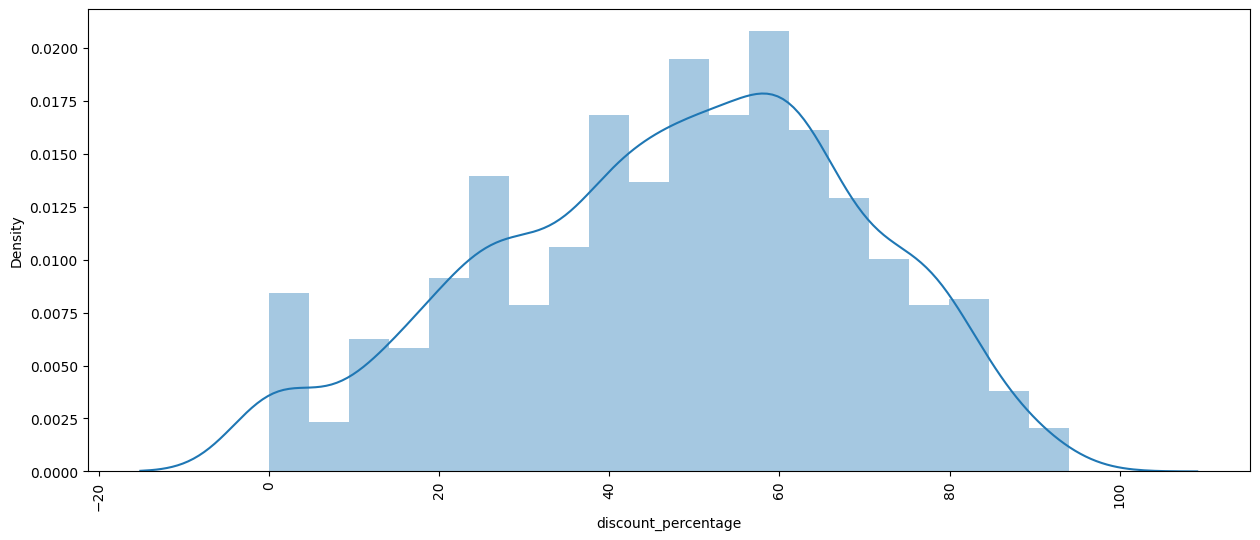

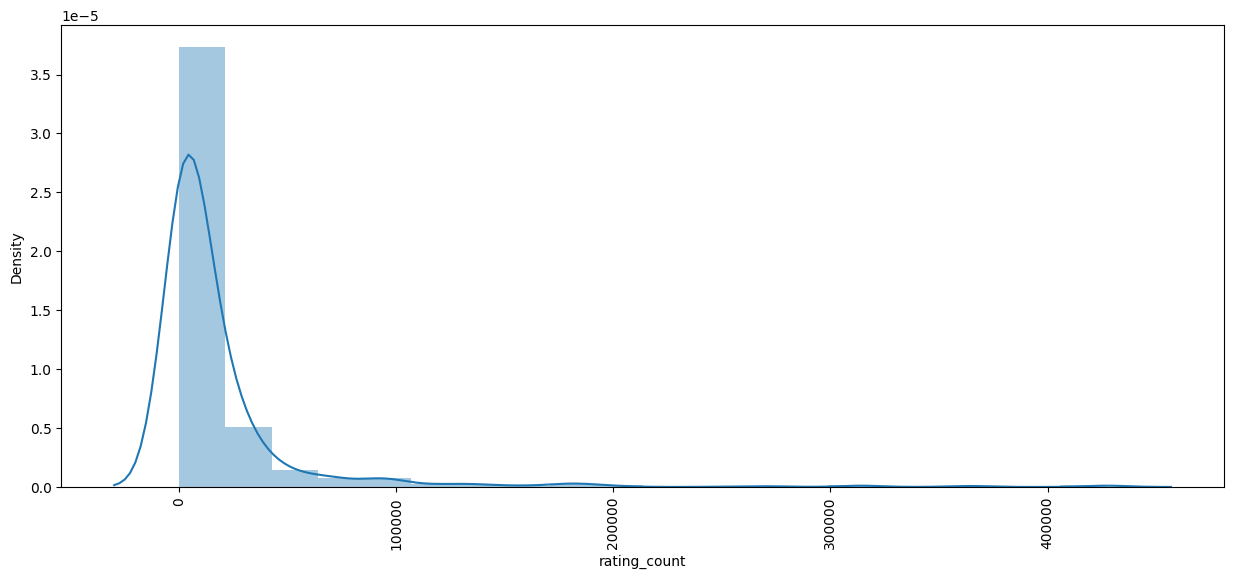

In [34]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

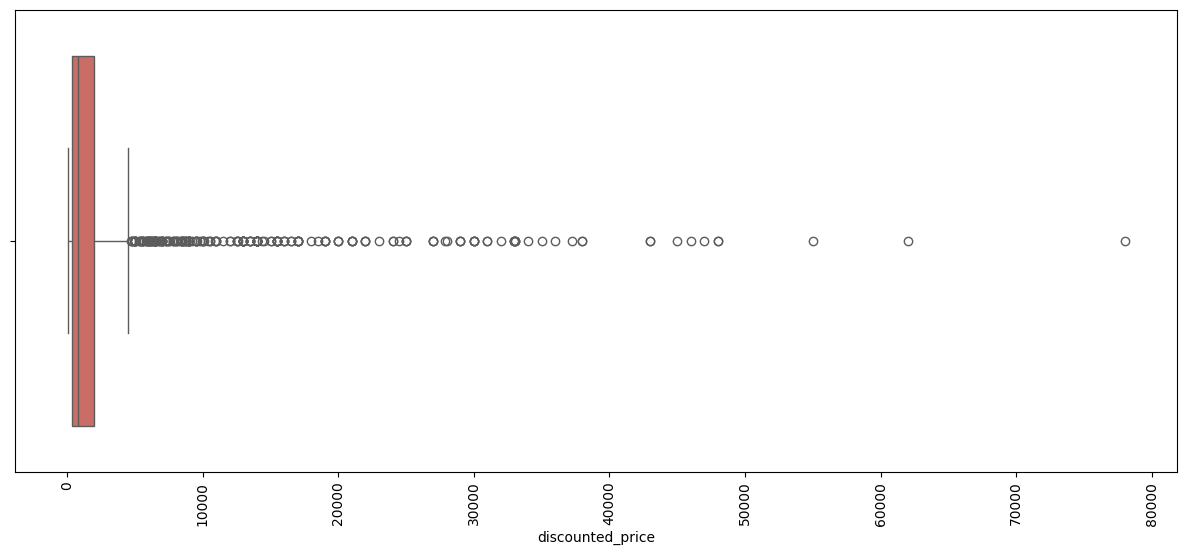

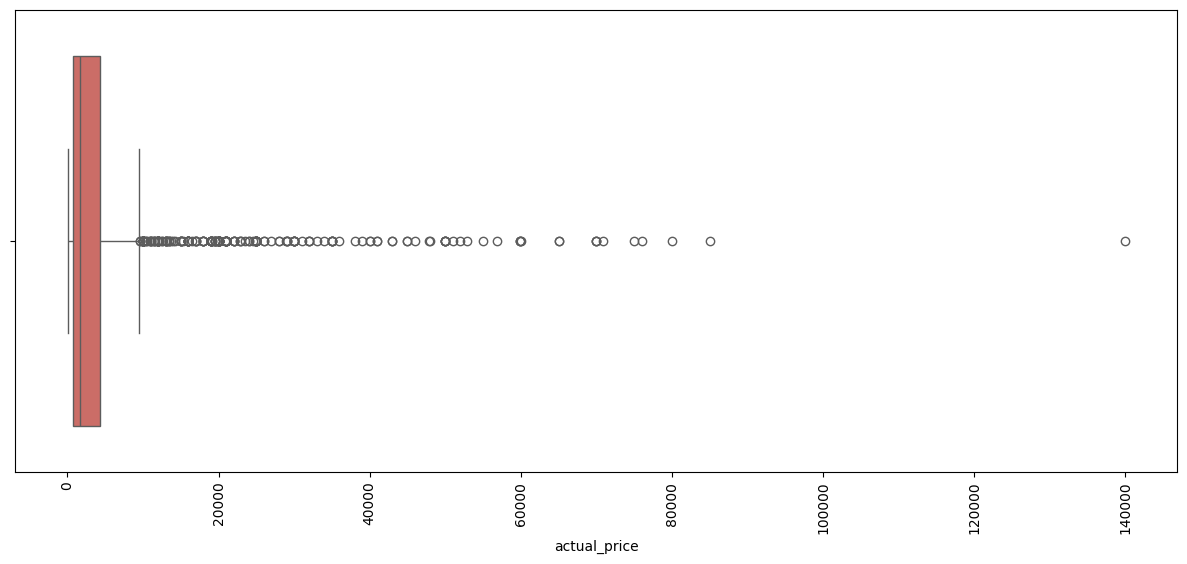

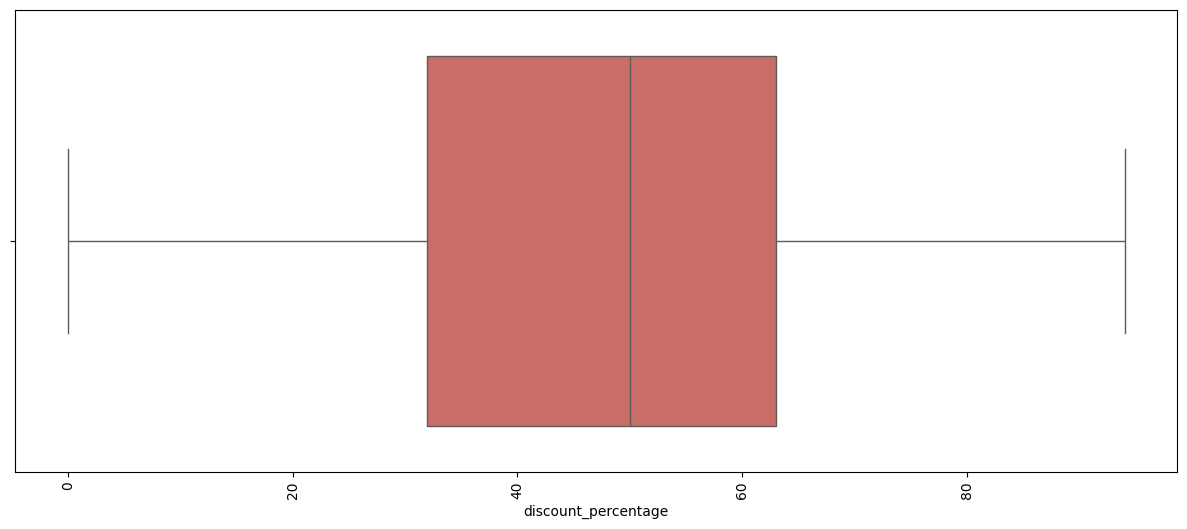

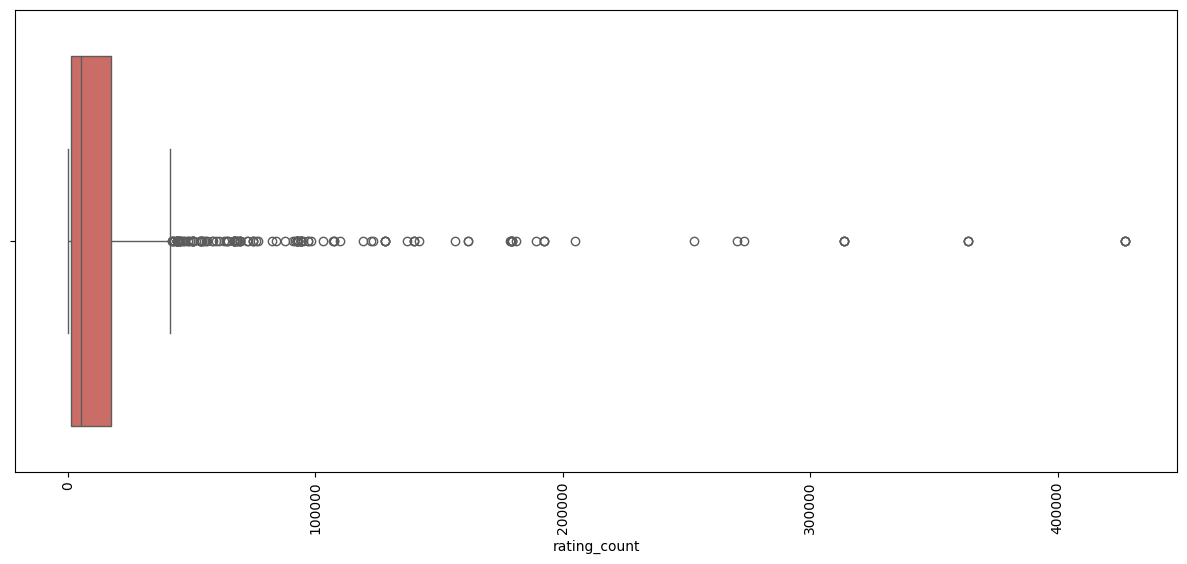

In [35]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

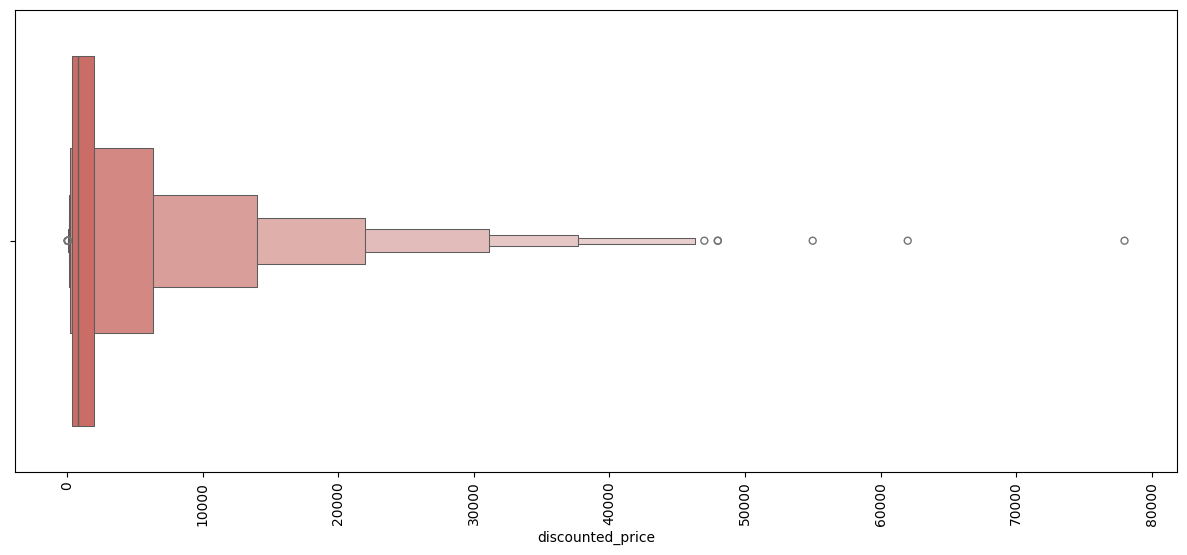

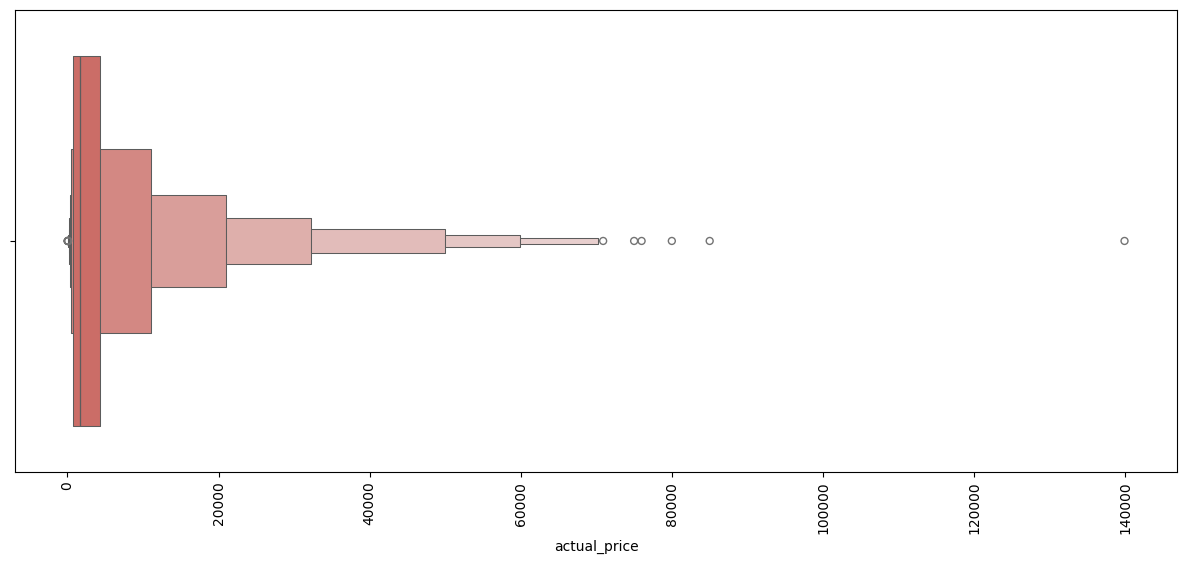

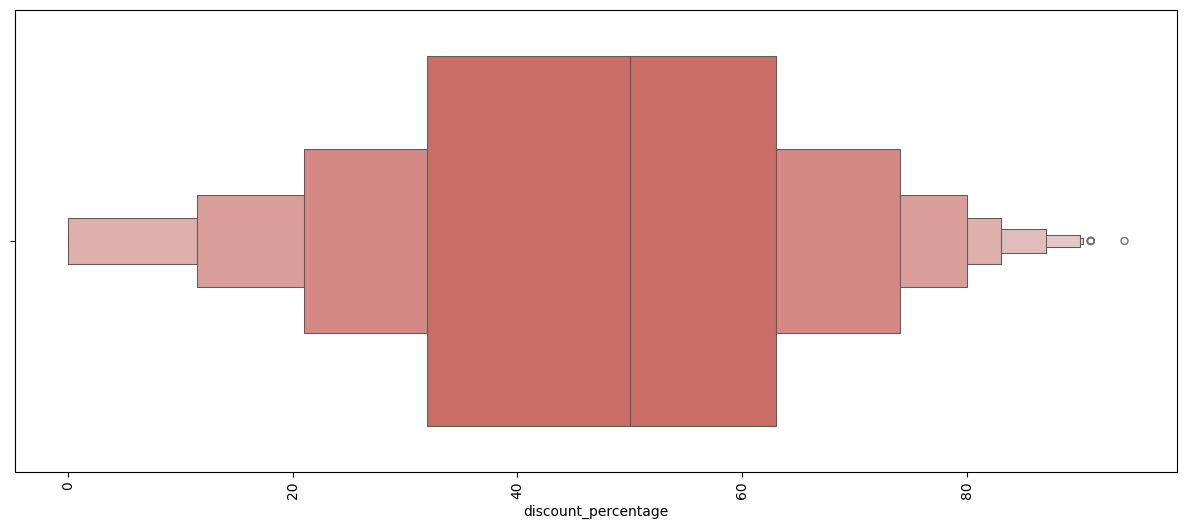

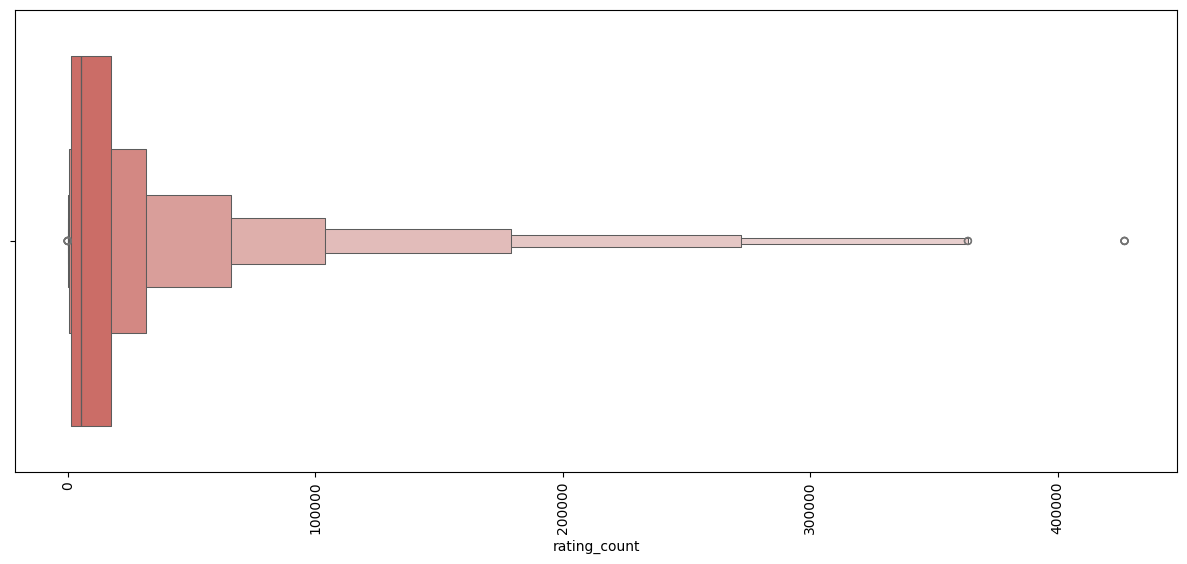

In [36]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

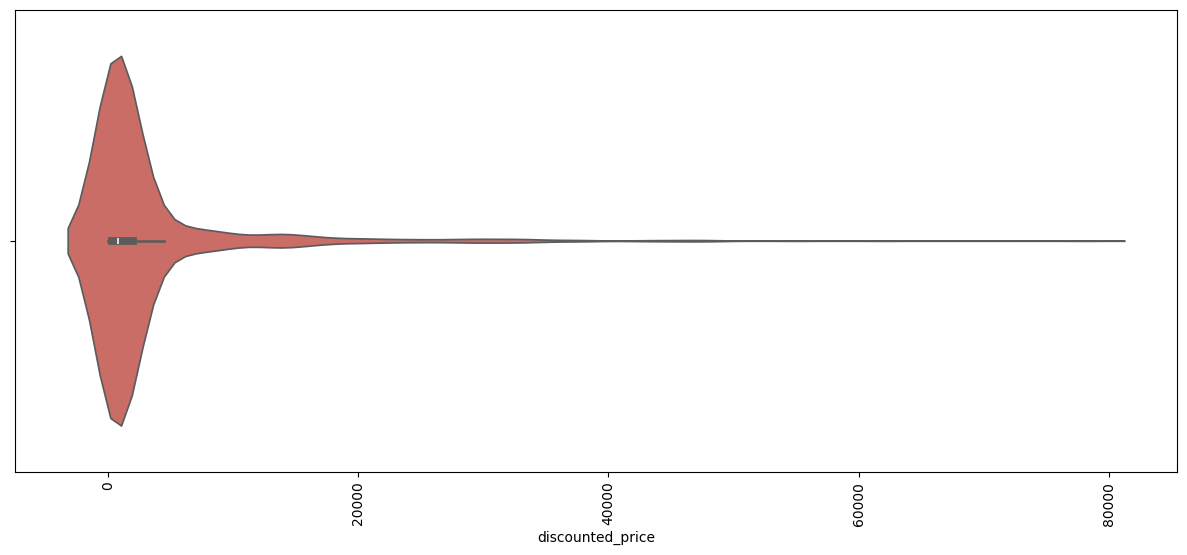

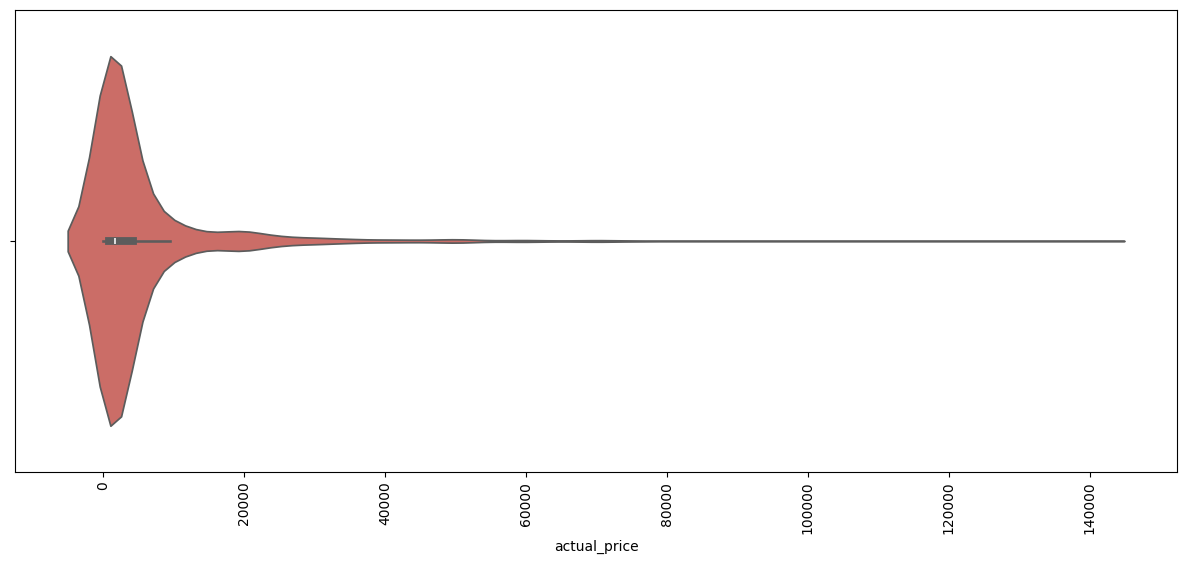

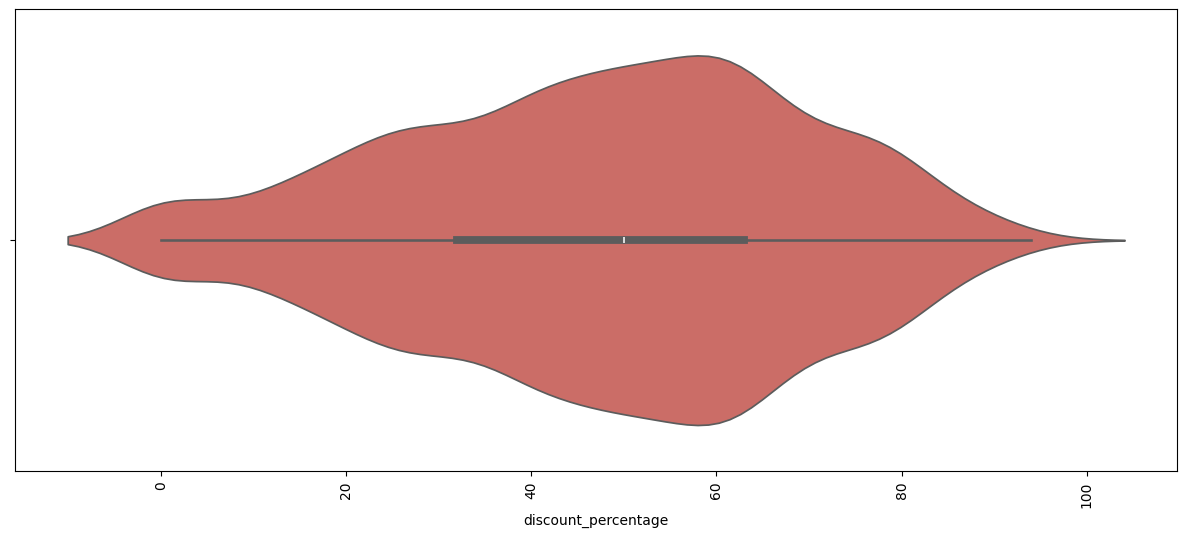

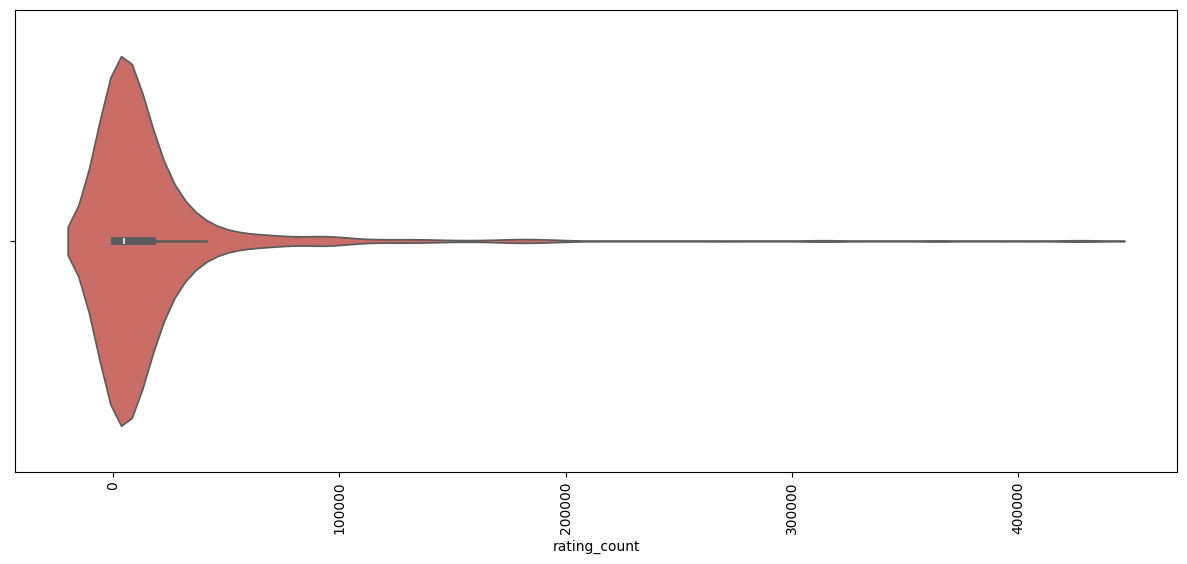

In [37]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

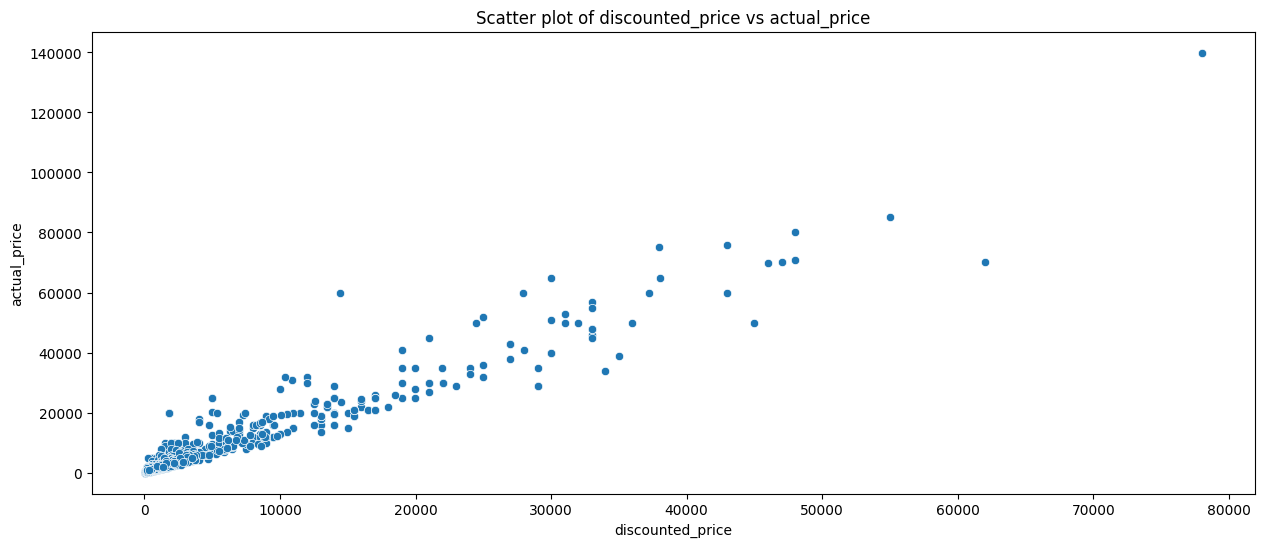

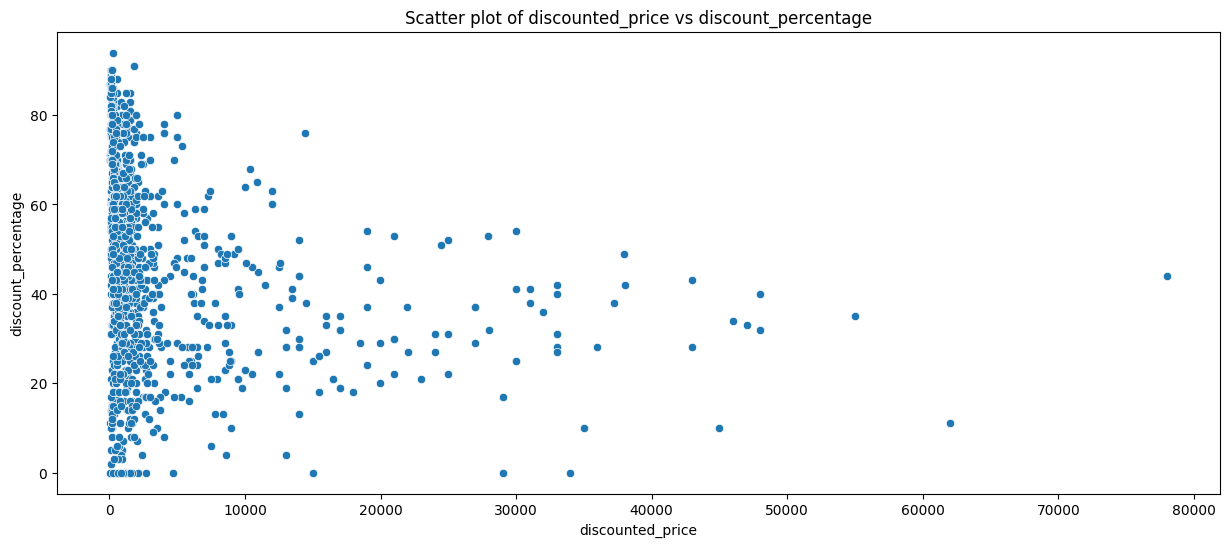

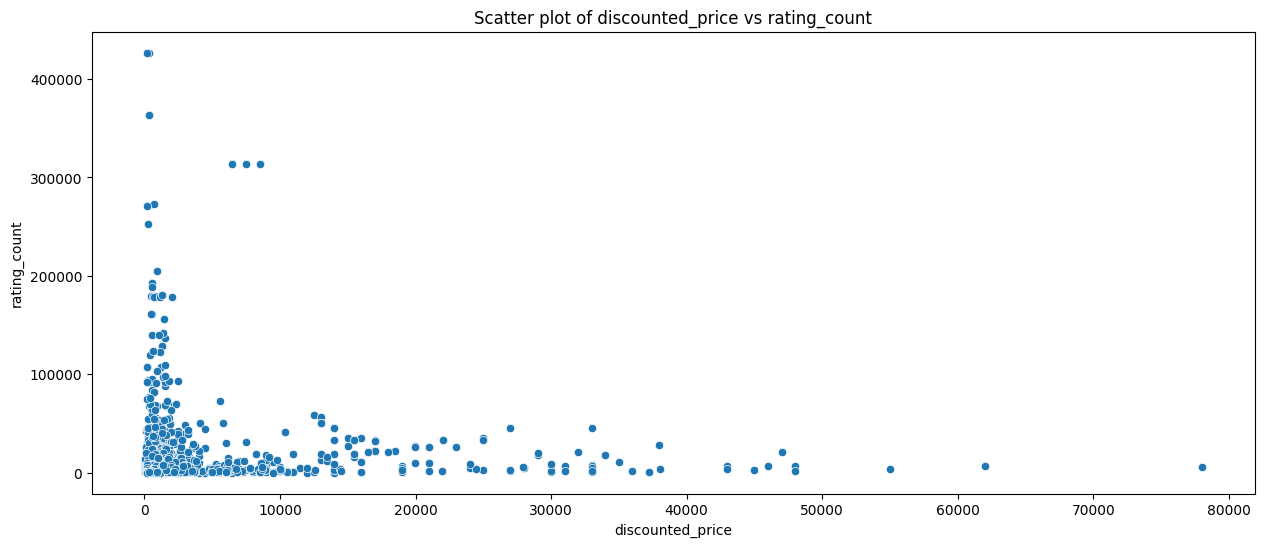

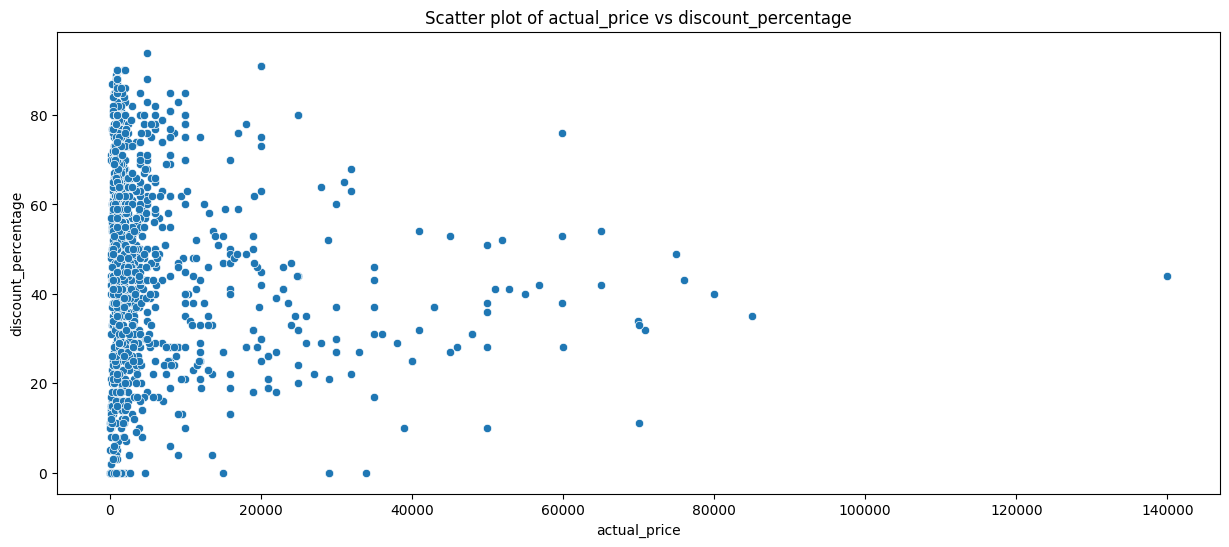

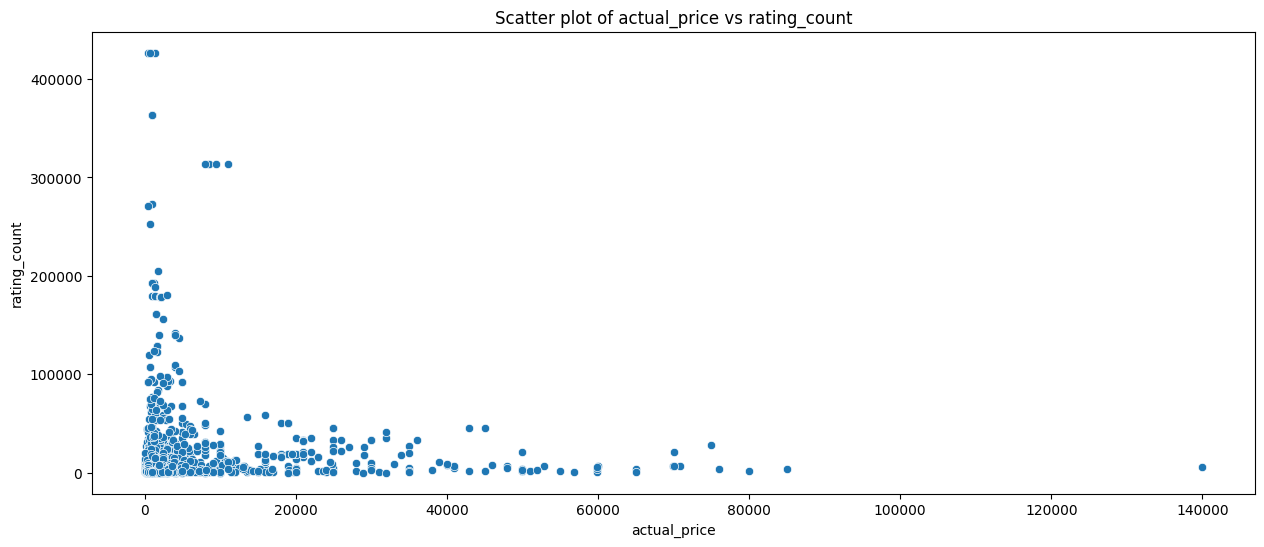

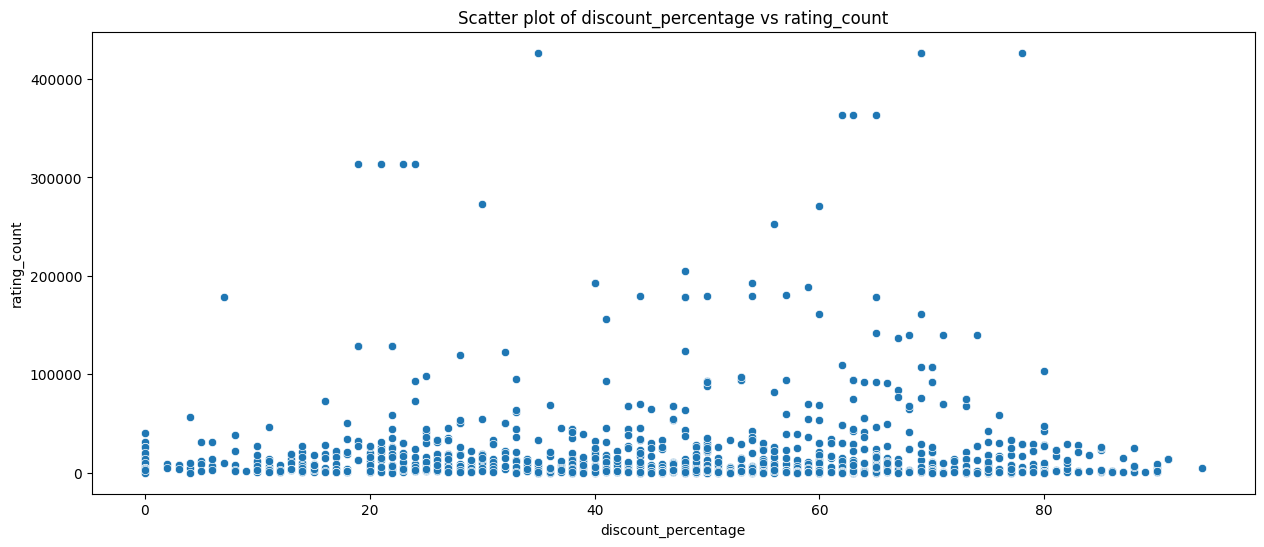

In [38]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=continuous[i], y=continuous[j], data=df, palette='hls')
        plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

# correlation analysis

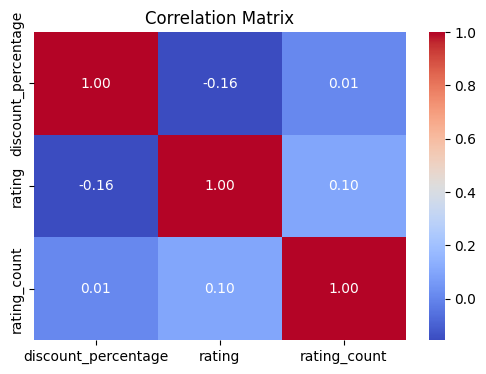

In [39]:
# Compute correlation matrix
correlation_matrix = df[['discount_percentage', 'rating', 'rating_count']].corr()
# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [40]:
# Compute correlation values
correlation_discount_rating = df['discount_percentage'].corr(df['rating'])
correlation_discount_reviews = df['discount_percentage'].corr(df['rating_count'])

# Print correlation results
print(f"Correlation between Discount Percentage and Rating: {correlation_discount_rating:.2f}")
print(f"Correlation between Discount Percentage and Review Count: {correlation_discount_reviews:.2f}")


Correlation between Discount Percentage and Rating: -0.16
Correlation between Discount Percentage and Review Count: 0.01


- **Correlation between Discount Percentage and Rating : -0.16** (Weak negative correlation)
This suggests that higher discounts slightly decrease ratings, but the effect is not strong. This could mean that products with higher discounts might have lower quality, leading to slightly worse ratings.

- **Correlation between Discount Percentage and Review Count: 0.01** (No significant correlation)
Discounts do not seem to influence the number of reviews. This means customers are not necessarily leaving more reviews just because a product has a high discount.

## visualizing the relationships

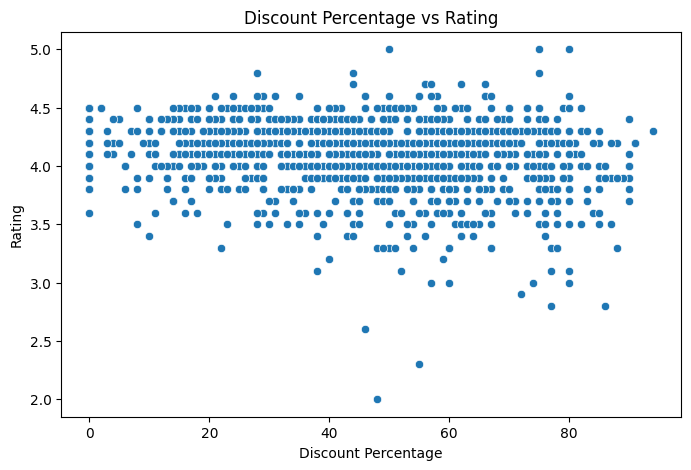

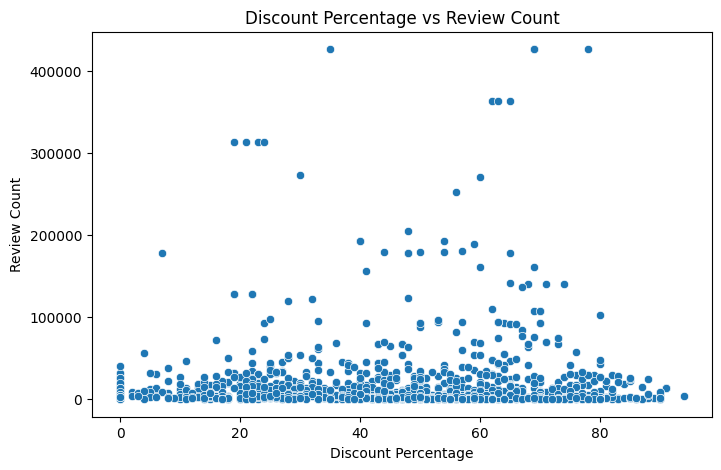

In [41]:
# Scatter plot for Discount % vs Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['discount_percentage'], y=df['rating'])
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.title('Discount Percentage vs Rating')
plt.show()

# Scatter plot for Discount % vs Review Count
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['discount_percentage'], y=df['rating_count'])
plt.xlabel('Discount Percentage')
plt.ylabel('Review Count')
plt.title('Discount Percentage vs Review Count')
plt.show()


# feature engineering

In [42]:
df['discount_range'] = pd.cut(df['discount_percentage'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

# Average rating per discount range
print(df.groupby('discount_range')['rating'].mean())
print()

# Average review count per discount range
print(df.groupby('discount_range')['rating_count'].mean())


discount_range
0-20%      4.146565
20-40%     4.126331
40-60%     4.079331
60-80%     4.076053
80-100%    3.976271
Name: rating, dtype: float64

discount_range
0-20%      16406.015267
20-40%     20265.585799
40-60%     15644.307087
60-80%     23200.084211
80-100%     9587.762712
Name: rating_count, dtype: float64


- this code creates a new feature named discount_range.
- pd.cut() is used to create discount range categories based on discount_percentage.
- The bins define the ranges: 0-20%, 20-40%, 40-60%, 60-80%, and 80-100%.
- The labels assign names to these ranges.
- After that Groups data by discount_range.
- Calculates the average rating for each discount range. And also Calculates the average number of reviews for each discount range.

In [43]:
df.columns

Index(['category', 'discounted_price', 'actual_price', 'discount_percentage',
       'rating', 'rating_count', 'discount_range'],
      dtype='object')

# **Price Discount Analysis 📊**

## **1. Discount Percentage vs. Average Rating**
### **Observations:**
- As the **discount percentage increases, the average rating decreases** slightly.
- **Products with very high discounts (80-100%) tend to have lower ratings (~3.98)** compared to products with **low discounts (~4.15 for 0-20%)**.
- This may suggest that **heavily discounted products are of lower quality** or customers have **higher expectations and feel dissatisfied** after purchase.



## **2. Discount Percentage vs. Average Review Count**

### **Observations:**
- **High discounts (60-80%) attract the most reviews (~23,200).**
- **Extremely high discounts (80-100%) get fewer reviews (~9,588).**
- **Moderate discounts (20-40%) also get a good number of reviews (~20,266).**

### **Possible Interpretation:**
- Products with **higher discounts (60-80%) attract more buyers**, leading to more reviews.
- **Very high discounts (80-100%) may be on low-demand or low-quality products**, leading to **fewer reviews and lower ratings**.
- Products with **small discounts (0-20%) still receive decent reviews**, likely because they are **high-quality products that do not need large discounts to sell**.

---

## **Key Takeaways ✅**
- **Higher discounts (>60%) tend to decrease ratings** slightly.  
- **Moderate discounts (20-40%) and high discounts (60-80%) drive more customer engagement (reviews).**  
- **Extreme discounts (80-100%) may indicate poor-quality products, leading to lower ratings and fewer reviews.**  



In [44]:
df.head(10)

,category,discounted_price,actual_price,discount_percentage,rating,rating_count,discount_range
0,Computers&Accessories,399.00,1099.0,64.0,4.2,24269.0,60-80%
1,Computers&Accessories,199.00,349.0,43.0,4.0,43994.0,40-60%
2,Computers&Accessories,199.00,1899.0,90.0,3.9,7928.0,80-100%
3,Computers&Accessories,329.00,699.0,53.0,4.2,94363.0,40-60%
4,Computers&Accessories,154.00,399.0,61.0,4.2,16905.0,60-80%
5,Computers&Accessories,149.00,1000.0,85.0,3.9,24871.0,80-100%
6,Computers&Accessories,176.63,499.0,65.0,4.1,15188.0,60-80%
7,Computers&Accessories,229.00,299.0,23.0,4.3,30411.0,20-40%
8,Computers&Accessories,499.00,999.0,50.0,4.2,179691.0,40-60%
9,Computers&Accessories,199.00,299.0,33.0,4.0,43994.0,20-40%


In [45]:
df['score'] = df['rating'] * df['rating_count']
df.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count,discount_range,score
0,Computers&Accessories,399.0,1099.0,64.0,4.2,24269.0,60-80%,101929.8
1,Computers&Accessories,199.0,349.0,43.0,4.0,43994.0,40-60%,175976.0
2,Computers&Accessories,199.0,1899.0,90.0,3.9,7928.0,80-100%,30919.2
3,Computers&Accessories,329.0,699.0,53.0,4.2,94363.0,40-60%,396324.6
4,Computers&Accessories,154.0,399.0,61.0,4.2,16905.0,60-80%,71001.0


In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])
df[['category', 'category_encoded']].drop_duplicates()


,category,category_encoded
0,Computers&Accessories,1
12,Electronics,2
613,MusicalInstruments,6
616,OfficeProducts,7
617,Home&Kitchen,4
805,HomeImprovement,5
924,Toys&Games,8
1157,Car&Motorbike,0
1247,Health&PersonalCare,3


In [47]:
df = pd.get_dummies(df, columns=['discount_range'], drop_first=True)

In [48]:
df.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count,score,category_encoded,discount_range_20-40%,discount_range_40-60%,discount_range_60-80%,discount_range_80-100%
0,Computers&Accessories,399.0,1099.0,64.0,4.2,24269.0,101929.8,1,False,False,True,False
1,Computers&Accessories,199.0,349.0,43.0,4.0,43994.0,175976.0,1,False,True,False,False
2,Computers&Accessories,199.0,1899.0,90.0,3.9,7928.0,30919.2,1,False,False,False,True
3,Computers&Accessories,329.0,699.0,53.0,4.2,94363.0,396324.6,1,False,True,False,False
4,Computers&Accessories,154.0,399.0,61.0,4.2,16905.0,71001.0,1,False,False,True,False


In [49]:
df[['discount_range_20-40%', 'discount_range_40-60%', 'discount_range_60-80%', 'discount_range_80-100%']] = \
df[['discount_range_20-40%', 'discount_range_40-60%', 'discount_range_60-80%', 'discount_range_80-100%']].astype(int)


In [50]:
df.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count,score,category_encoded,discount_range_20-40%,discount_range_40-60%,discount_range_60-80%,discount_range_80-100%
0,Computers&Accessories,399.0,1099.0,64.0,4.2,24269.0,101929.8,1,0,0,1,0
1,Computers&Accessories,199.0,349.0,43.0,4.0,43994.0,175976.0,1,0,1,0,0
2,Computers&Accessories,199.0,1899.0,90.0,3.9,7928.0,30919.2,1,0,0,0,1
3,Computers&Accessories,329.0,699.0,53.0,4.2,94363.0,396324.6,1,0,1,0,0
4,Computers&Accessories,154.0,399.0,61.0,4.2,16905.0,71001.0,1,0,0,1,0


# standard scaler for balancing data between 0 to 1

In [51]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns
num_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'score']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply transformation
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df.head())  # Check scaled values


                category  discounted_price  actual_price  discount_percentage  \
0  Computers&Accessories         -0.392731     -0.399774             0.754029   
1  Computers&Accessories         -0.421541     -0.468764            -0.216911   
2  Computers&Accessories         -0.421541     -0.326185             1.956146   
3  Computers&Accessories         -0.402814     -0.436569             0.245441   
4  Computers&Accessories         -0.428024     -0.464165             0.615323   

     rating  rating_count     score  category_encoded  discount_range_20-40%  \
0  0.354792      0.140271  0.143290                 1                      0   
1 -0.331373      0.602076  0.554694                 1                      0   
2 -0.674456     -0.242307 -0.251248                 1                      0   
3  0.354792      1.781324  1.778961                 1                      0   
4  0.354792     -0.032136 -0.028552                 1                      0   

   discount_range_40-60%  discou

In [52]:
threshold = 5  # Categories with less than 5 samples will be merged
rare_categories = df['category_encoded'].value_counts()[df['category_encoded'].value_counts() < threshold].index

df['category_encoded'] = df['category_encoded'].replace(rare_categories, -1)  # Assign -1 for "Other"


In [53]:
X = df.drop(columns=['category', 'category_encoded'])  # Features
y = df['category_encoded']  # Target

In [54]:
print(y.value_counts())


category_encoded
 2    526
 1    453
 4    448
 7     31
-1      7
Name: count, dtype: int64


In [55]:
df.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count,score,category_encoded,discount_range_20-40%,discount_range_40-60%,discount_range_60-80%,discount_range_80-100%
0,Computers&Accessories,-0.392731,-0.399774,0.754029,0.354792,0.140271,0.143290,1,0,0,1,0
1,Computers&Accessories,-0.421541,-0.468764,-0.216911,-0.331373,0.602076,0.554694,1,0,1,0,0
2,Computers&Accessories,-0.421541,-0.326185,1.956146,-0.674456,-0.242307,-0.251248,1,0,0,0,1
3,Computers&Accessories,-0.402814,-0.436569,0.245441,0.354792,1.781324,1.778961,1,0,1,0,0
4,Computers&Accessories,-0.428024,-0.464165,0.615323,0.354792,-0.032136,-0.028552,1,0,0,1,0


# training data without applying smote

In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['category', 'category_encoded'])  # Features
y = df['category_encoded']  # Target

# Split the dataset (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print class distribution after 
print(y_train.value_counts())


category_encoded
 2    421
 1    362
 4    358
 7     25
-1      6
Name: count, dtype: int64


# random forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7098976109215017
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           1       0.63      0.75      0.68        91
           2       0.78      0.72      0.75       105
           4       0.74      0.69      0.71        90
           7       0.67      0.33      0.44         6

    accuracy                           0.71       293
   macro avg       0.56      0.50      0.52       293
weighted avg       0.71      0.71      0.71       293



In [58]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 2. Precision (weighted average)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision (weighted):", precision)

# 3. Recall (weighted average)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall (weighted):", recall)

# 4. F1-Score (weighted average)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score (weighted):", f1)

Accuracy: 0.7098976109215017
Precision (weighted): 0.7138342633223179
Recall (weighted): 0.7098976109215017
F1-Score (weighted): 0.7085878570996286


# making predictions

In [59]:
import joblib

# Save the trained model
joblib.dump(rf, "random_forest_model.pkl")

# Save the LabelEncoder for categories
joblib.dump(le, "label_encoder.pkl")

# Save the StandardScaler
joblib.dump(scaler, "scaler.pkl")

print("Model and preprocessing objects saved successfully!")


Model and preprocessing objects saved successfully!


In [61]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load trained models and encoders
rf = joblib.load("random_forest_model.pkl")
le = joblib.load("label_encoder.pkl")
scaler = joblib.load("scaler.pkl")

# Get user input
discounted_price = float(input("Enter discounted price: "))
actual_price = float(input("Enter actual price: "))
rating = float(input("Enter product rating: "))
rating_count = float(input("Enter number of ratings: "))

# Compute additional features
discount_percentage = ((actual_price - discounted_price) / actual_price) * 100
score = discounted_price * rating * rating_count

# Convert discount percentage into categorical ranges
if discount_percentage < 20:
    discount_range = "0-20%"
elif 20 <= discount_percentage < 40:
    discount_range = "20-40%"
elif 40 <= discount_percentage < 60:
    discount_range = "40-60%"
elif 60 <= discount_percentage < 80:
    discount_range = "60-80%"
else:
    discount_range = "80-100%"

# One-hot encode discount range
discount_range_encoded = {
    "discount_range_20-40%": int(discount_range == "20-40%"),
    "discount_range_40-60%": int(discount_range == "40-60%"),
    "discount_range_60-80%": int(discount_range == "60-80%"),
    "discount_range_80-100%": int(discount_range == "80-100%"),
}

# Prepare input data
input_data = pd.DataFrame([[
    discounted_price, actual_price, discount_percentage,
    rating, rating_count, score,
    discount_range_encoded["discount_range_20-40%"],
    discount_range_encoded["discount_range_40-60%"],
    discount_range_encoded["discount_range_60-80%"],
    discount_range_encoded["discount_range_80-100%"]
]], columns=['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'score',
             'discount_range_20-40%', 'discount_range_40-60%', 'discount_range_60-80%', 'discount_range_80-100%'])

# Apply scaling
num_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'score']
input_data[num_cols] = scaler.transform(input_data[num_cols])

# Make prediction
predicted_category_encoded = rf.predict(input_data)[0]
predicted_category = le.inverse_transform([predicted_category_encoded])[0]

# Display result
print(f"Predicted Category: {predicted_category}")


Enter discounted price:  2
Enter actual price:  2
Enter product rating:  2
Enter number of ratings:  2


Predicted Category: Home&Kitchen


# ratio 70 : 30

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['category', 'category_encoded'])  # Features
y = df['category_encoded']  # Target

# Split the dataset (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print class distribution after 
print(y_train.value_counts())


category_encoded
 2    368
 1    317
 4    313
 7     22
-1      5
Name: count, dtype: int64


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6727272727272727
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         2
           1       0.62      0.70      0.66       136
           2       0.74      0.66      0.70       158
           4       0.69      0.69      0.69       135
           7       0.36      0.44      0.40         9

    accuracy                           0.67       440
   macro avg       0.48      0.50      0.49       440
weighted avg       0.68      0.67      0.67       440



In [64]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 2. Precision (weighted average)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision (weighted):", precision)

# 3. Recall (weighted average)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall (weighted):", recall)

# 4. F1-Score (weighted average)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score (weighted):", f1)

Accuracy: 0.6727272727272727
Precision (weighted): 0.6755822245667507
Recall (weighted): 0.6727272727272727
F1-Score (weighted): 0.6725563822366891


# ratio 75:25

In [65]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['category', 'category_encoded'])  # Features
y = df['category_encoded']  # Target

# Split the dataset (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Print class distribution after 
print(y_train.value_counts())


category_encoded
 2    394
 1    340
 4    336
 7     23
-1      5
Name: count, dtype: int64


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6784741144414169
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         2
           1       0.63      0.70      0.66       113
           2       0.76      0.67      0.71       132
           4       0.66      0.69      0.68       112
           7       0.44      0.50      0.47         8

    accuracy                           0.68       367
   macro avg       0.50      0.51      0.50       367
weighted avg       0.68      0.68      0.68       367



In [67]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 2. Precision (weighted average)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision (weighted):", precision)

# 3. Recall (weighted average)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall (weighted):", recall)

# 4. F1-Score (weighted average)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score (weighted):", f1)

Accuracy: 0.6784741144414169
Precision (weighted): 0.6804540587248471
Recall (weighted): 0.6784741144414169
F1-Score (weighted): 0.6779075781885342
